In [3]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import pandas as pd
import numpy as np
from datetime import datetime

In [4]:
con = sqlite3.connect("/home/dominik/Projekte/Code/LuftdatenMesser_21-01-30/SQL-Datenbank-Backup/sensorDaten.db")
cur = con.cursor()

In [6]:
sensordaten = pd.read_sql('SELECT * FROM sensordaten WHERE pm2_5 NOT NULL', con)
# one_day = pd.read_sql('SELECT * FROM sensordaten WHERE pm2_5 NOT NULL AND day="07.03.21";', con)
sensordaten["day_and_time"] = sensordaten["day"]+"\n"+sensordaten["time"]



Length of sensordaten = 1417<br>
Messured days = 5 (from 04.03 - 09.03)<br>
xticks = 1417 / 5 <br>
== 283


In [7]:
length_of_sensordaten = 1417-50
messured_days = 5
ticks = length_of_sensordaten / messured_days
print(ticks)

273.4


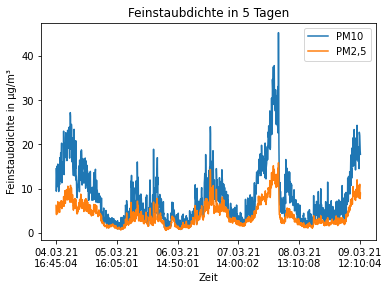

In [8]:
fig, ax = plt.subplots()
ax.plot(sensordaten.day_and_time[50:],sensordaten.pm10[50:],label="PM10")
ax.plot(sensordaten.day_and_time[50:],sensordaten.pm2_5[50:],label="PM2,5")
# ax.plot(sensordaten.day_and_time[50:],sensordaten.humidity[50:])

ax.set_title('Feinstaubdichte in 5 Tagen')
ax.set_xticks(ax.get_xticks()[::273])
ax.set_xlabel('Zeit')
ax.set_ylabel('Feinstaubdichte in µg/m³')

ax.legend()
plt.show()


In [9]:
one_day = sensordaten["day"] == "05.03.21"
one_day = sensordaten[one_day]


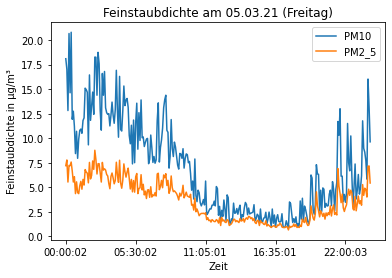

In [10]:
fig, ax = plt.subplots()
ax.plot(one_day.time,one_day.pm10,label="PM10")
ax.plot(one_day.time,one_day.pm2_5,label="PM2_5")
ax.set_title('Feinstaubdichte am 05.03.21 (Freitag)')
ax.set_xticks(ax.get_xticks()[::65])

ax.legend()
ax.set_xlabel('Zeit')
ax.set_ylabel('Feinstaubdichte in µg/m³')
plt.show()

134
           3            2
1.837e-06 x - 0.001334 x + 0.2782 x - 11.5


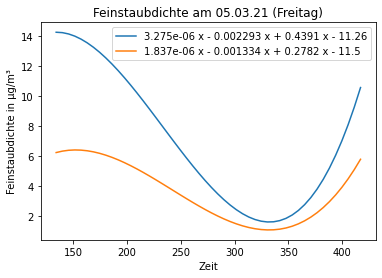

In [11]:
fig, ax = plt.subplots()
ax.set_title('Feinstaubdichte am 05.03.21 (Freitag)')

pm10 = np.poly1d(np.polyfit(one_day.index, one_day.pm10, 3))
pm10l = np.linspace(one_day.index[0], one_day.index[-1])
pm2_5 = np.poly1d(np.polyfit(one_day.index, one_day.pm2_5, 3))
pm2_5l = np.linspace(one_day.index[0], one_day.index[-1])
print( one_day.index[0])
ax.plot(pm10l, pm10(pm10l),label="3.275e-06 x - 0.002293 x + 0.4391 x - 11.26")
ax.plot(pm2_5l, pm2_5(pm2_5l),label="1.837e-06 x - 0.001334 x + 0.2782 x - 11.5")
print(pm2_5)
ax.legend()
ax.set_xlabel('Zeit')
ax.set_ylabel('Feinstaubdichte in µg/m³')
plt.show()

In [21]:
attr_dataframe = one_day
attr_ul = attr_dataframe.pm10
attr_ur = attr_dataframe.temperature
attr_bl = attr_dataframe.pm2_5
attr_br = attr_dataframe.humidity
attr_x = attr_dataframe.time

attr = attr_ur
sum_of_attr = sum(attr)
val_relative = 0
expected_val = 0
average_val = sum_of_attr / attr.shape[0]

for index, val in enumerate(attr):
    val_relative = (val/sum_of_attr + val_relative)
    expected_val = val_relative*index +expected_val
print(average_val)

2.0950704225352124


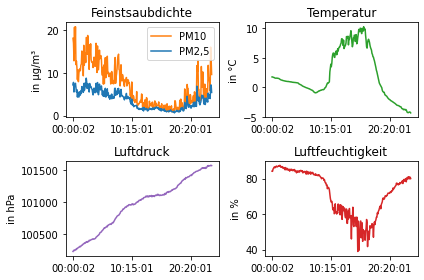

In [30]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(attr_x,attr_ul,'tab:orange',label = "PM10")

axs[0, 0].plot(attr_x, attr_bl,label = "PM2,5",)
axs[0, 0].set_title("Feinstsaubdichte")

axs[0, 1].plot(attr_x, attr_ur,'tab:green')
axs[0, 1].set_title("Temperatur")

axs[1, 0].plot(attr_x, attr_dataframe.pressure,'tab:purple')
axs[1, 0].set_title("Luftdruck")

axs[1, 0].sharex(axs[0, 0])

axs[1, 1].plot(attr_x, attr_br,'tab:red')
axs[1, 1].set_title("Luftfeuchtigkeit")

axs[0, 0].set_ylabel('in µg/m³')
axs[1, 0].set_ylabel('in hPa')
axs[1, 1].set_ylabel('in %')
axs[0, 1].set_ylabel('in °C')

axs[0, 1].set_xticks(axs[0, 0].get_xticks()[::120])
axs[1, 1].set_xticks(axs[0, 0].get_xticks()[::120])
axs[0, 0].set_xticks(axs[0, 0].get_xticks()[::120])
axs[0, 0].legend()
# ul = axs[0, 0].add_artist(lines.Line2D([-100,1000],[6.9313380281690185,6.9313380281690185],color="tab:orange",label="Mittelwert"))
# ula = axs[0, 0].add_artist(lines.Line2D([-100,1000],[2.0950704225352124,2.0950704225352124],color="tab:blue",label="Mittelwert"))



fig.tight_layout()

$$c = \sqrt{a^2 + b^2}$$
